In [3]:
!pip install roboflow

from roboflow import Roboflow

rf = Roboflow(api_key="DxcmzoSss9tESnAilxTk")
project = rf.workspace("us-traffic-signs").project("us-road-signs")
version = project.version(58)
dataset = version.download("yolov8")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.5/84.5 kB 10.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 9.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 19.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 111.2 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.11.0.86
    Uninstalling opencv-python-headless-4.11.0.86:
      Successfully uninstalled opencv-python-headless-4.11.0.86
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to US-Road-Signs-58 in yolov8:: 100%|██████████| 3208/3208 [00:00<00:00, 3880.59it/s]


In [4]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 932.6/932.6 kB 60.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 62.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 35.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 49.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 50.2 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstall

In [8]:
from ultralytics import YOLO
model = YOLO("yolov8n.pt")

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 6.25M/6.25M [00:00<00:00, 212MB/s]


In [9]:
model.info()

YOLOv8n summary: 129 layers, 3,157,200 parameters, 0 gradients, 8.9 GFLOPs


(129, 3157200, 0, 8.8575488)

In [10]:
results = model.train(
    data="/content/US-Road-Signs-58/data.yaml",
    epochs=30,  # Reduced from 50 to 30
    imgsz=1024,  # Reduced from 1280 for better training speed and VRAM efficiency
    batch=16,  # Keeping batch size the same
    optimizer='AdamW',
    lr0=0.005,  # Lower initial learning rate for stability
    lrf=0.0002,  # Slightly increased final learning rate for smoother convergence
    momentum=0.93,  # Slightly reduced for better generalization
    weight_decay=0.0005,
    iou=0.45,  # Increased for better localization precision
    conf=0.4,  # Higher confidence threshold to reduce false positives
    mosaic=0.8,  # Reduced slightly to balance augmentation impact
    scale=0.4,  # Slightly reduced to control augmentation variability
    flipud=0.4,  # Slightly reduced to avoid excessive augmentation distortion
    fliplr=0.5,  # Kept the same
    degrees=5  # Keeping it at 5 for controlled rotations
)

Ultralytics 8.3.89 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/US-Road-Signs-58/data.yaml, epochs=30, time=None, patience=100, batch=16, imgsz=1024, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=AdamW, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=0.4, iou=0.45, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True,

100%|██████████| 755k/755k [00:00<00:00, 124MB/s]


Overriding model.yaml nc=80 with nc=3

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

100%|██████████| 5.35M/5.35M [00:00<00:00, 338MB/s]


AMP: checks passed ✅


train: Scanning /content/US-Road-Signs-58/train/labels... 1401 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1401/1401 [00:02<00:00, 640.88it/s]

train: New cache created: /content/US-Road-Signs-58/train/labels.cache
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 180, len(boxes) = 2421. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/US-Road-Signs-58/valid/labels... 122 images, 0 backgrounds, 0 corrupt: 100%|██████████| 122/122 [00:00<00:00, 484.11it/s]

val: New cache created: /content/US-Road-Signs-58/valid/labels.cache
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 20, len(boxes) = 190. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: AdamW(lr=0.005, momentum=0.93) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 1024 train, 1024 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 30 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/30       5.1G      1.332      2.202      1.525         26       1024: 100%|██████████| 88/88 [00:59<00:00,  1.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:04<00:00,  1.03s/it]

                   all        122        190      0.517      0.402      0.412      0.305



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/30      6.24G      1.338      1.653      1.525         23       1024: 100%|██████████| 88/88 [00:53<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.36it/s]

                   all        122        190      0.365      0.407      0.428      0.289



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/30      6.25G        1.3      1.508      1.474         31       1024: 100%|██████████| 88/88 [00:54<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.82it/s]

                   all        122        190      0.489      0.437      0.417        0.3



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/30      6.25G      1.283      1.414      1.465         22       1024: 100%|██████████| 88/88 [00:54<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.49it/s]

                   all        122        190      0.735      0.708      0.692       0.51



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/30      6.25G      1.246      1.365      1.451         23       1024: 100%|██████████| 88/88 [00:54<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.82it/s]

                   all        122        190      0.763      0.768      0.806      0.607



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/30      6.25G      1.187      1.297      1.391         19       1024: 100%|██████████| 88/88 [00:54<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.63it/s]

                   all        122        190      0.769      0.728      0.786      0.567



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/30      6.25G      1.138      1.182      1.379         21       1024: 100%|██████████| 88/88 [00:55<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.67it/s]

                   all        122        190      0.883       0.76      0.825      0.628



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/30      6.25G      1.117        1.1       1.34         22       1024: 100%|██████████| 88/88 [00:55<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.59it/s]

                   all        122        190      0.847      0.833      0.858      0.675



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/30      6.25G      1.129      1.141      1.347         18       1024: 100%|██████████| 88/88 [00:55<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.76it/s]

                   all        122        190      0.876      0.843      0.874      0.684



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/30      6.25G      1.093       1.09      1.324         27       1024: 100%|██████████| 88/88 [00:54<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.40it/s]

                   all        122        190      0.908      0.799      0.856      0.671



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/30      6.25G      1.069      1.046      1.295         18       1024: 100%|██████████| 88/88 [00:54<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.71it/s]

                   all        122        190      0.939      0.829      0.893       0.69



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/30      6.25G      1.072      1.019      1.303         24       1024: 100%|██████████| 88/88 [00:56<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.38it/s]

                   all        122        190      0.917      0.854      0.906      0.644



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/30      6.25G      1.048     0.9708      1.272         20       1024: 100%|██████████| 88/88 [00:54<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        122        190      0.844      0.875       0.88      0.663



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/30      6.25G      1.034     0.9689      1.275         27       1024: 100%|██████████| 88/88 [00:55<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.59it/s]

                   all        122        190      0.915      0.837      0.903      0.655



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/30      6.25G       1.01     0.9282      1.249         31       1024: 100%|██████████| 88/88 [00:54<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.73it/s]

                   all        122        190      0.885      0.877      0.913       0.71



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/30      6.25G      1.007     0.9251      1.244         15       1024: 100%|██████████| 88/88 [00:54<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.60it/s]

                   all        122        190      0.884       0.87      0.896      0.724



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/30      6.25G     0.9916     0.8855       1.25         22       1024: 100%|██████████| 88/88 [00:54<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.87it/s]

                   all        122        190        0.9      0.871      0.915      0.722



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/30      6.25G     0.9678     0.8605      1.211         22       1024: 100%|██████████| 88/88 [00:54<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.47it/s]

                   all        122        190      0.908      0.852      0.916      0.759



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/30      6.25G     0.9534     0.8238      1.208         22       1024: 100%|██████████| 88/88 [00:54<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.72it/s]

                   all        122        190      0.906      0.864       0.92      0.722



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/30      6.25G     0.9248     0.7781      1.187         18       1024: 100%|██████████| 88/88 [00:53<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.49it/s]

                   all        122        190      0.881      0.873      0.911      0.734


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/30      6.25G     0.8856     0.7019      1.158         12       1024: 100%|██████████| 88/88 [00:55<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.69it/s]

                   all        122        190      0.926      0.841      0.903      0.723



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/30      6.25G     0.8632     0.6723      1.132         12       1024: 100%|██████████| 88/88 [00:51<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.71it/s]

                   all        122        190      0.911      0.853      0.918      0.747



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/30      6.25G     0.8557     0.6632      1.141         17       1024: 100%|██████████| 88/88 [00:52<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.93it/s]

                   all        122        190      0.917      0.857      0.916      0.732



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/30      6.25G     0.8373      0.637      1.115         14       1024: 100%|██████████| 88/88 [00:52<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.82it/s]

                   all        122        190       0.94      0.855      0.919      0.708



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/30      6.25G     0.8418     0.6175      1.118         15       1024: 100%|██████████| 88/88 [00:51<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.88it/s]

                   all        122        190      0.898      0.877       0.92      0.718



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/30      6.25G     0.8269     0.6045      1.108         15       1024: 100%|██████████| 88/88 [00:51<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.94it/s]

                   all        122        190      0.895       0.88      0.924      0.744



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/30      6.25G     0.8097     0.5846      1.094         15       1024: 100%|██████████| 88/88 [00:51<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.55it/s]

                   all        122        190      0.902      0.875       0.92      0.746



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/30      6.25G     0.7916      0.565      1.084         18       1024: 100%|██████████| 88/88 [00:52<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.90it/s]

                   all        122        190      0.891      0.881      0.913       0.74



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/30      6.25G     0.7838     0.5525      1.082         16       1024: 100%|██████████| 88/88 [00:51<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.85it/s]

                   all        122        190      0.906      0.867      0.911      0.739



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/30      6.25G     0.7914      0.539      1.086         14       1024: 100%|██████████| 88/88 [00:52<00:00,  1.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.72it/s]

                   all        122        190      0.913       0.86      0.921      0.745



30 epochs completed in 0.481 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 6.3MB
Optimizer stripped from runs/detect/train/weights/best.pt, 6.3MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.89 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,006,233 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.10it/s]


                   all        122        190      0.908      0.852      0.916      0.759
            regulatory         61         84      0.879      0.714      0.833      0.687
                  stop         55         56      0.946      0.941       0.97      0.817
               warning         45         50      0.899        0.9      0.944      0.773
Speed: 0.6ms preprocess, 6.0ms inference, 0.0ms loss, 2.7ms postprocess per image
Results saved to runs/detect/train


In [11]:
results = model.val()

Ultralytics 8.3.89 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,006,233 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning /content/US-Road-Signs-58/valid/labels.cache... 122 images, 0 backgrounds, 0 corrupt: 100%|██████████| 122/122 [00:00<?, ?it/s]

WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 20, len(boxes) = 190. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:05<00:00,  1.47it/s]


                   all        122        190      0.908      0.852      0.915      0.758
            regulatory         61         84      0.879      0.714      0.833      0.688
                  stop         55         56      0.946      0.942      0.969      0.813
               warning         45         50      0.899        0.9      0.944      0.773
Speed: 11.0ms preprocess, 10.3ms inference, 0.0ms loss, 2.3ms postprocess per image
Results saved to runs/detect/train2



image 1/1 /content/US-Road-Signs-58/test/images/IMG_0450_jpg.rf.1a03ed9343670223514c1e59898e1db1.jpg: 1024x1024 1 stop, 17.9ms
Speed: 11.5ms preprocess, 17.9ms inference, 2.2ms postprocess per image at shape (1, 3, 1024, 1024)
Results saved to runs/detect/train153
Processed: IMG_0450_jpg.rf.1a03ed9343670223514c1e59898e1db1.jpg -> Saved to /content/detections/detected_IMG_0450_jpg.rf.1a03ed9343670223514c1e59898e1db1.jpg

image 1/1 /content/US-Road-Signs-58/test/images/IMG_0453_jpg.rf.e9a328b09762980a7cc15c6d7e9b042e.jpg: 1024x1024 1 warning, 13.3ms
Speed: 9.1ms preprocess, 13.3ms inference, 1.6ms postprocess per image at shape (1, 3, 1024, 1024)
Results saved to runs/detect/train154
Processed: IMG_0453_jpg.rf.e9a328b09762980a7cc15c6d7e9b042e.jpg -> Saved to /content/detections/detected_IMG_0453_jpg.rf.e9a328b09762980a7cc15c6d7e9b042e.jpg

image 1/1 /content/US-Road-Signs-58/test/images/IMG_0486_jpg.rf.ced03060c61ee8b22346679ce889c3b8.jpg: 1024x1024 1 regulatory, 13.3ms
Speed: 7.7ms pre

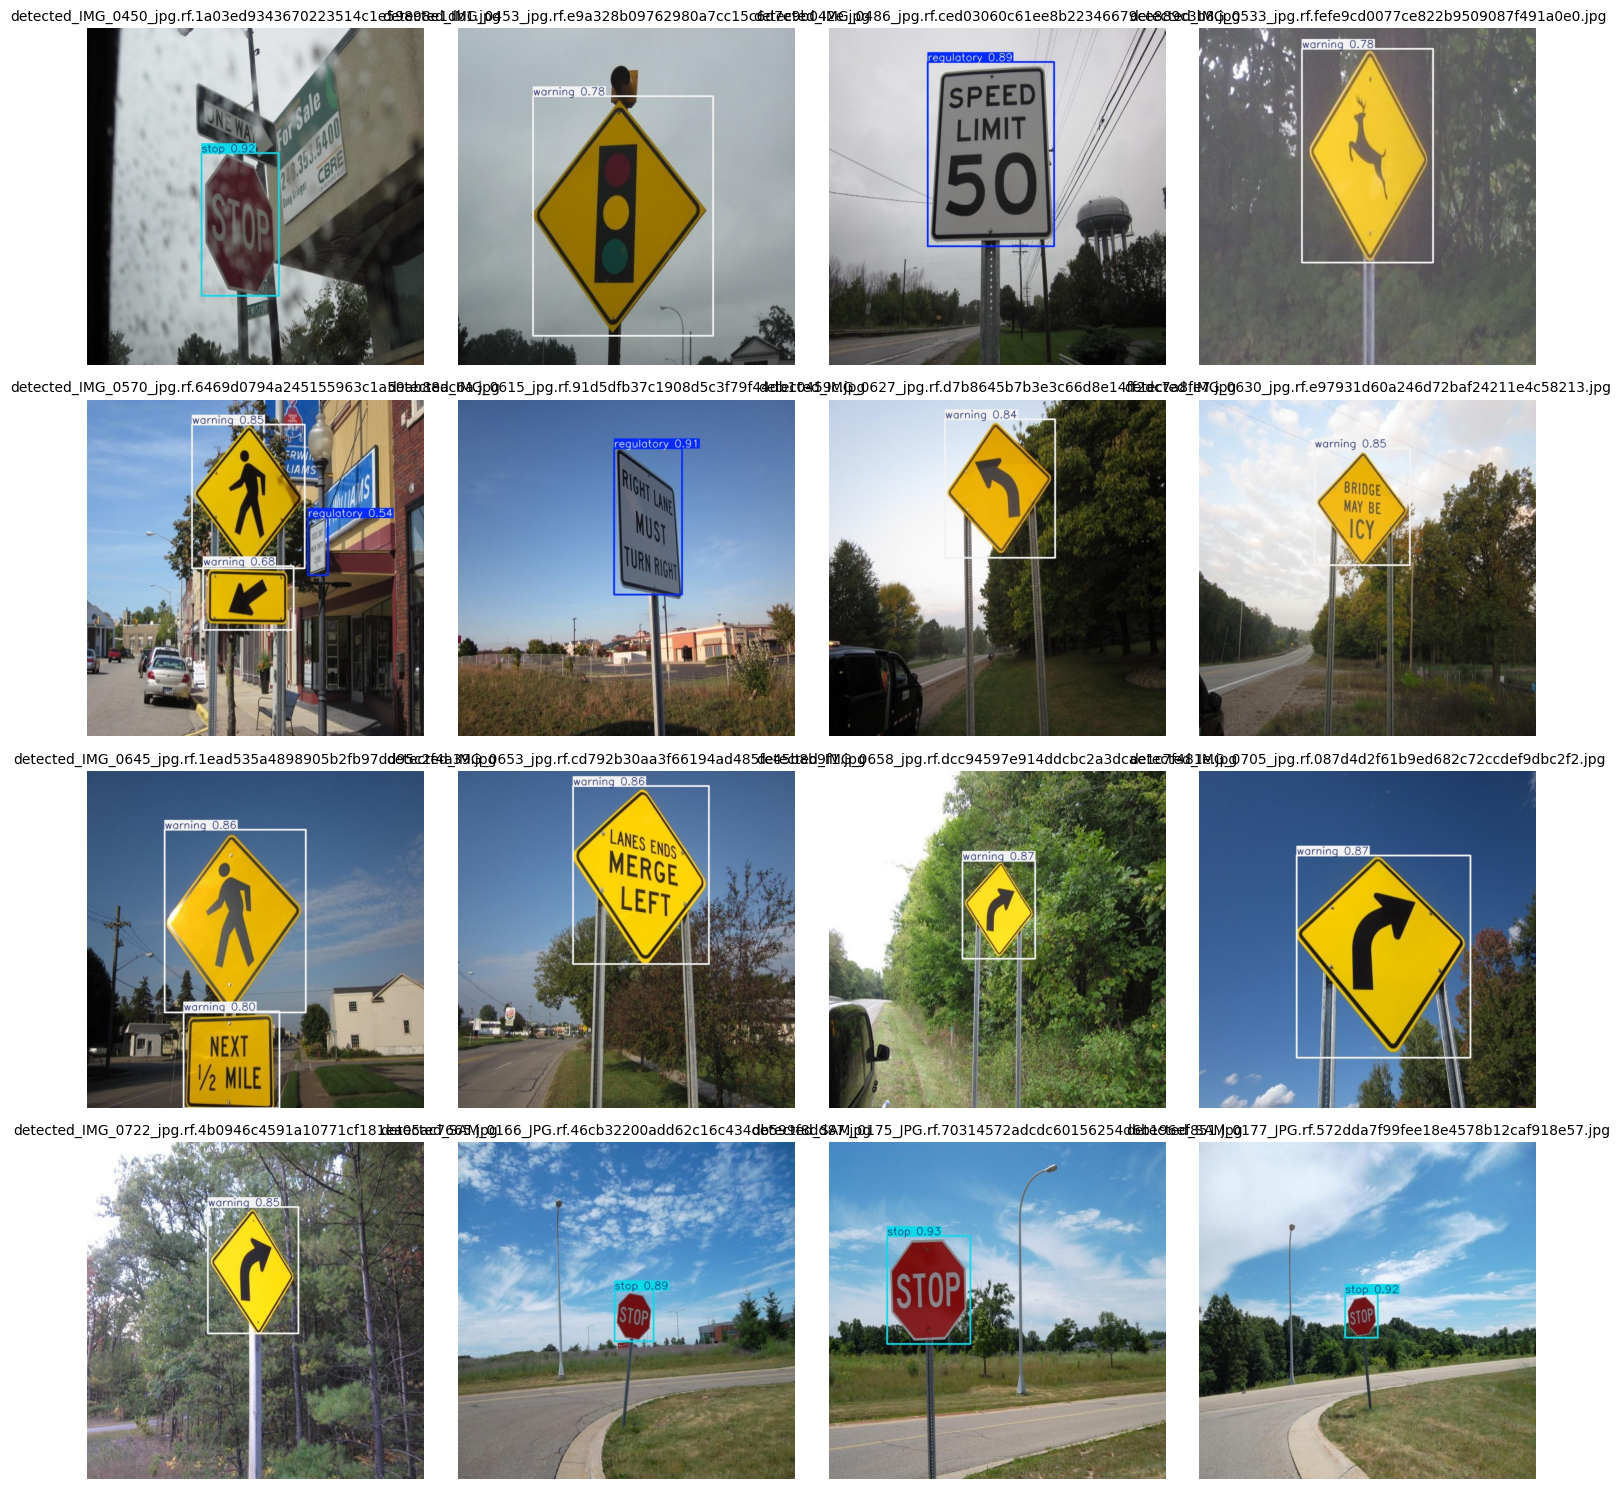

In [14]:
import os
import cv2
import matplotlib.pyplot as plt
# from ultralytics import YOLO

test_images_folder = "/content/US-Road-Signs-58/test/images"
output_folder = "/content/detections"

# Create output folder if it doesn't exist
os.makedirs(output_folder, exist_ok=True)

# Loop through all images in the test dataset
for image_name in sorted(os.listdir(test_images_folder)):  # Sort to process in order
    if image_name.endswith((".jpg", ".png", ".jpeg")):  # Ensure it's an image file
        image_path = os.path.join(test_images_folder, image_name)

        # Run inference with confidence threshold and NMS tuning
        results = model(image_path, save=True, conf=0.5, iou=0.4)  # Adjust conf & iou as needed

        # Save detected image
        for result in results:
            output_image = result.plot()  # Get image with detections
            output_path = os.path.join(output_folder, f"detected_{image_name}")
            cv2.imwrite(output_path, output_image)

        print(f"Processed: {image_name} -> Saved to {output_path}")

print("✅ Inference completed on all test images!")

# Function to display detected images in a 4x4 grid
def show_detected_images(folder_path, num_images=16):
    image_files = sorted(os.listdir(folder_path))[:num_images]  # Select first 16 images
    rows, cols = 4, 4  # 4 rows, 4 columns
    fig, axes = plt.subplots(rows, cols, figsize=(15, 15))  # Bigger image size

    for i, img_file in enumerate(image_files):
        img_path = os.path.join(folder_path, img_file)
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB for Matplotlib

        row, col = divmod(i, cols)  # Compute row & column position
        axes[row, col].imshow(img)
        axes[row, col].axis("off")
        axes[row, col].set_title(img_file, fontsize=10)

    plt.tight_layout()
    plt.show()

# Show 16 detected images in a 4x4 grid
show_detected_images(output_folder, num_images=16)


## Detecting Small Objects

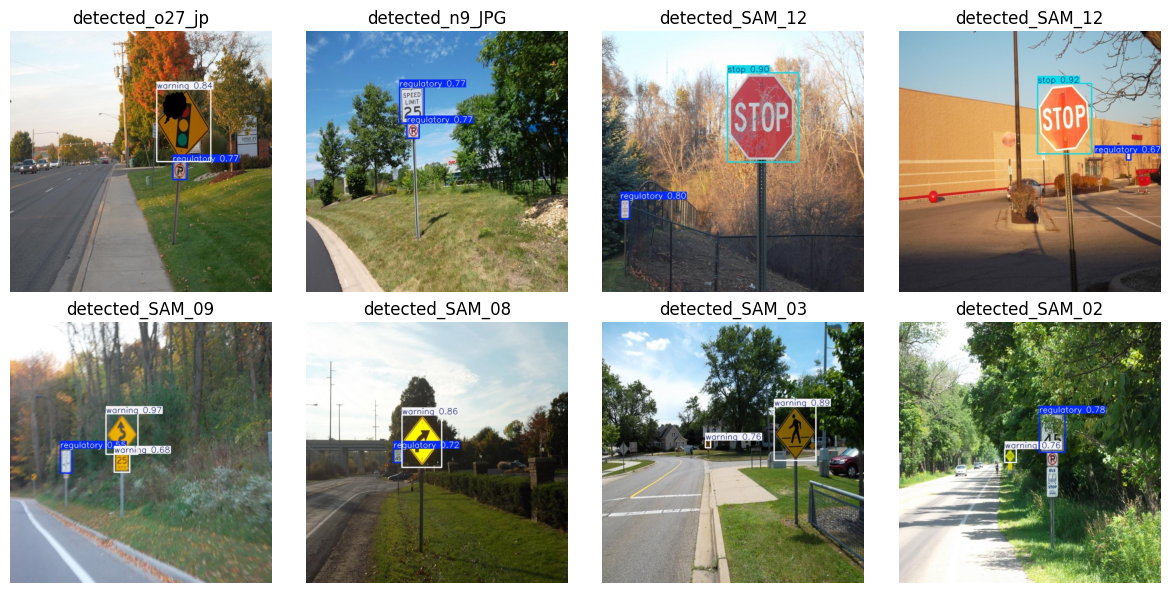

In [16]:
import os
import matplotlib.pyplot as plt
from PIL import Image

# Define the folder path
folder_path = "/content/detections"

# List of selected images from the screenshot
selected_images = [
    "detected_o27_jpg.rf.1ea4497d2a494fd89867aa4b7b74e49b.jpg",
    "detected_n9_JPG.rf.45c5a7ba8d22ec7f465391735e8b7196.jpg",
    "detected_SAM_1231_JPG.rf.de42551c0d349aeebf4c5cfcb81cab4f.jpg",
    "detected_SAM_1221_JPG.rf.32ffeb5e3af762b691da837fa82e59fd.jpg",
    "detected_SAM_0979_JPG.rf.7ff2eb22a7d0e4a4c1db161355ba8843.jpg",
    "detected_SAM_0800_JPG.rf.edb88b8e205313fb5d5fce7cdd9460a5.jpg",
    "detected_SAM_0328_JPG.rf.3d48badaaf84e1ce32d9d6d501cddb86.jpg",
    "detected_SAM_0205_JPG.rf.075c3a134fa144930f3d10761f6fc9e5.jpg"
]

# Set up the figure
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(12, 6))  # 2 rows, 4 columns
axes = axes.flatten()

# Display images
for ax, img_name in zip(axes, selected_images):
    img_path = os.path.join(folder_path, img_name)
    if os.path.exists(img_path):  # Check if the file exists
        img = Image.open(img_path)
        ax.imshow(img)
        ax.set_title(img_name[:15])  # Show part of the filename
        ax.axis("off")
    else:
        ax.set_title("Not found")
        ax.axis("off")

plt.tight_layout()
plt.show()


## Confusion Matrix

## Results

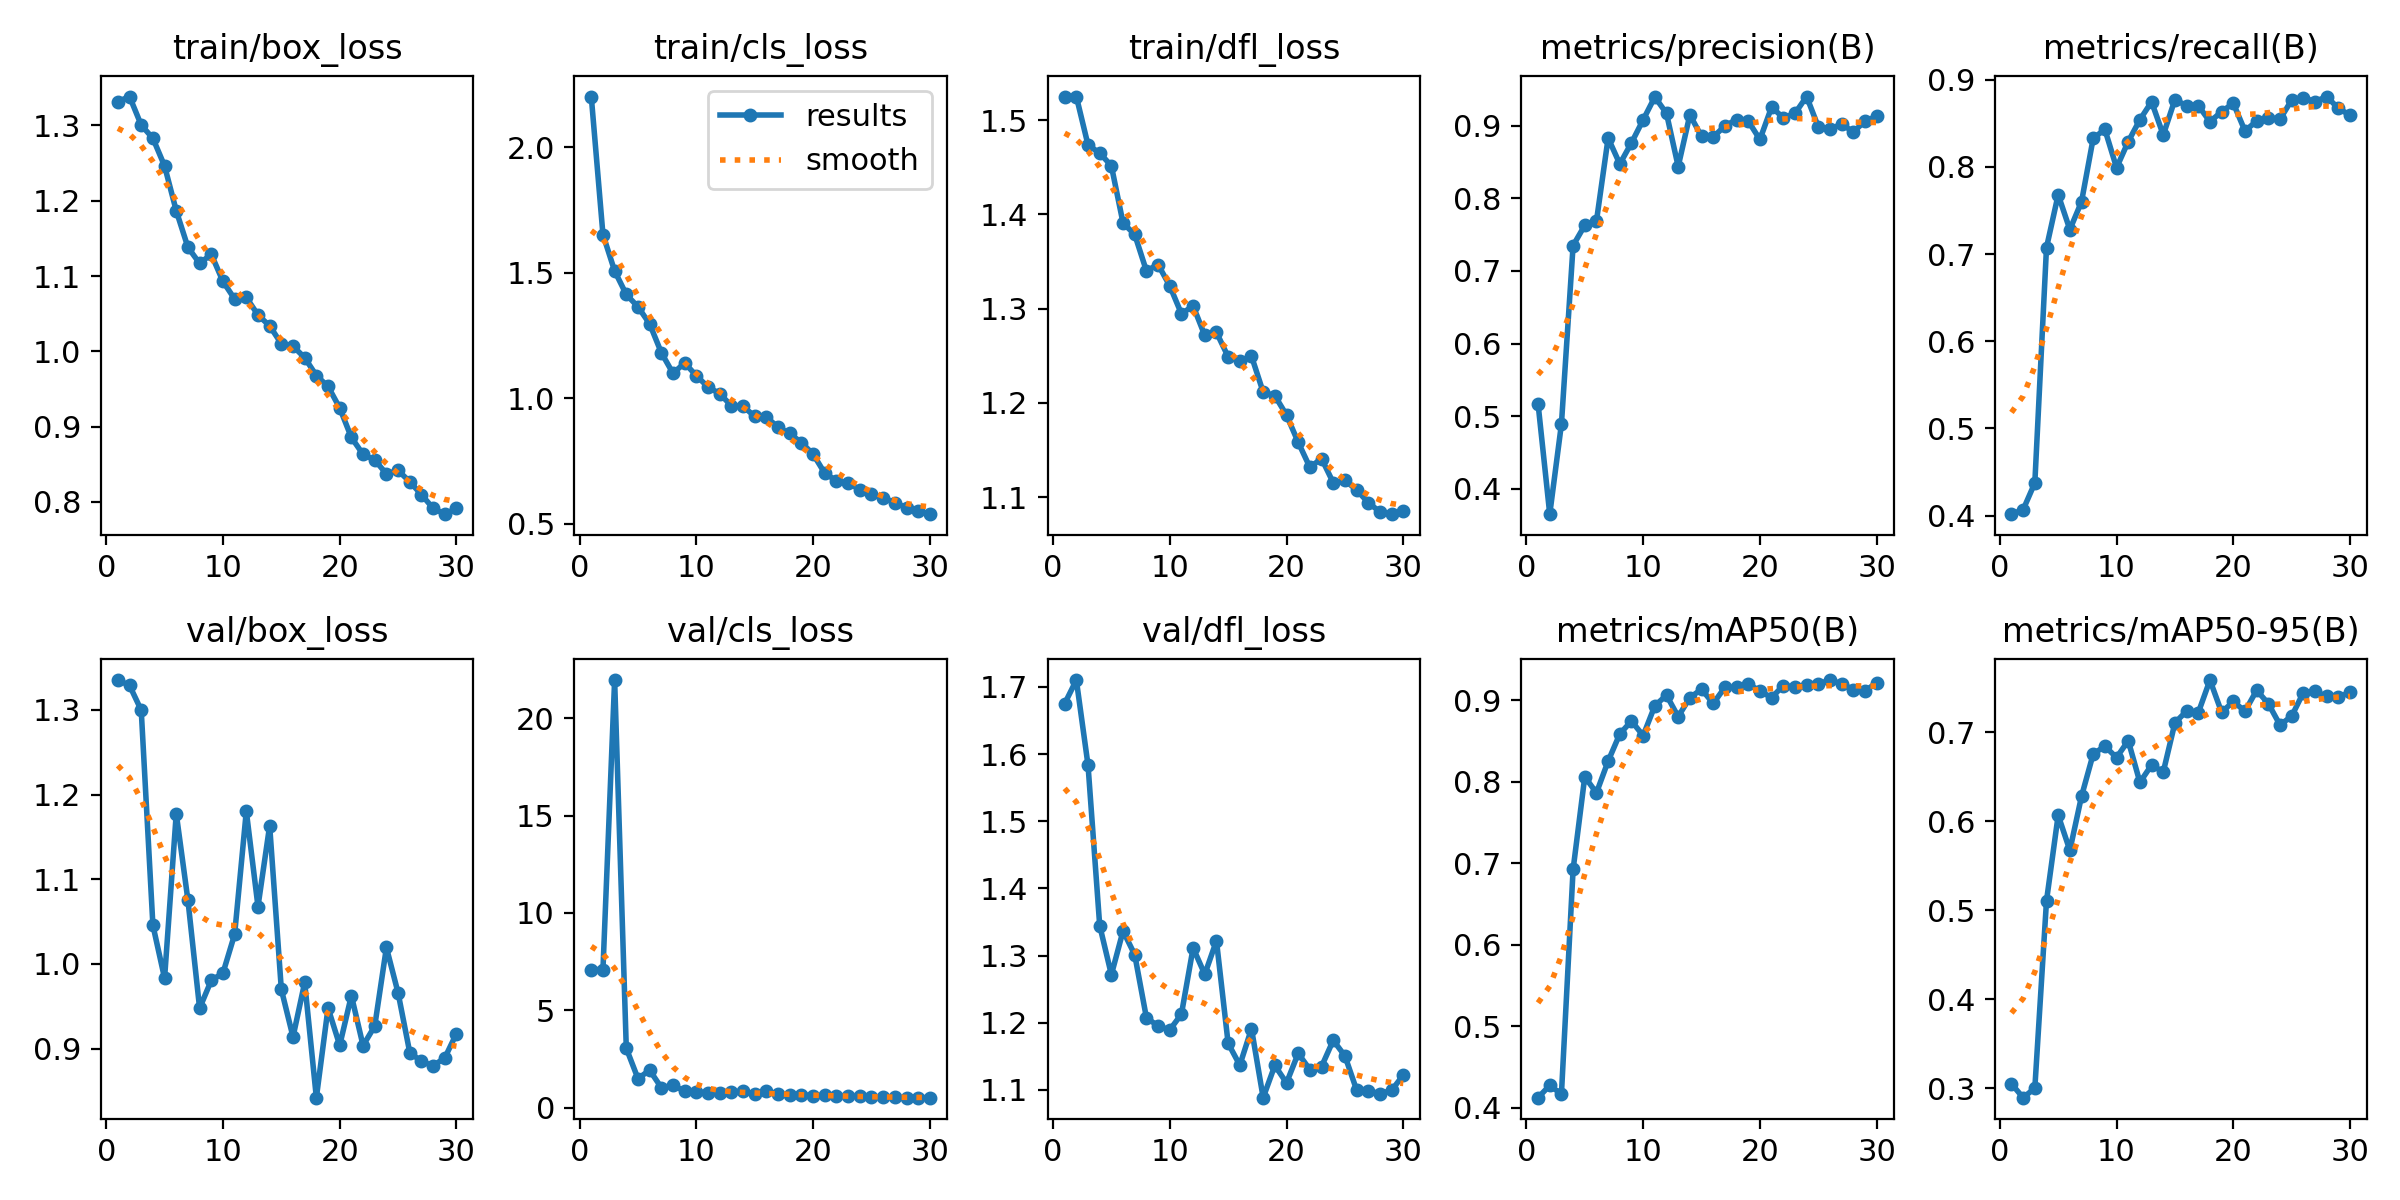

In [21]:
Image(filename=f'/content/runs/detect/train/results.png')